# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1jZOQHZGmhdTclFNAW4NGFHAOxP8KHB5B')
music = pd.DataFrame(data)
music = music.loc[music.duration_ms > 0]
music = music.sample(30000)

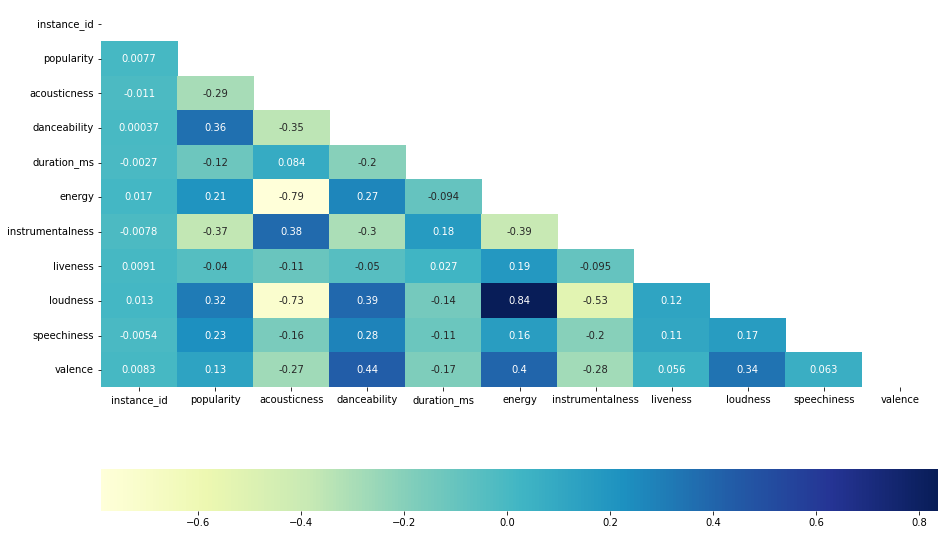

In [ ]:
cor_matrix = music.corr()
fig, axis = plt.subplots(1, 1, figsize=(15, 10))
matrix = np.triu(cor_matrix)
sns.heatmap(ax = axis, data = cor_matrix, annot = True, cmap = "YlGnBu", cbar_kws = {'orientation': 'horizontal'}, mask = matrix)

Выводы

Ярко выраженную положительную корреляцию можно увидеть между параметрами loudness и energy

Ярко выраженную отрицательную корреляцию имеют пары параметров:

"energy" и "acousticness"
"loudness" и "acousticness"
"loudness" и "instrumentalness"

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

Наибольшая отрицательная корреляция между:
acousticness and loudness
energy and acousticness
loudness and instrumentalness


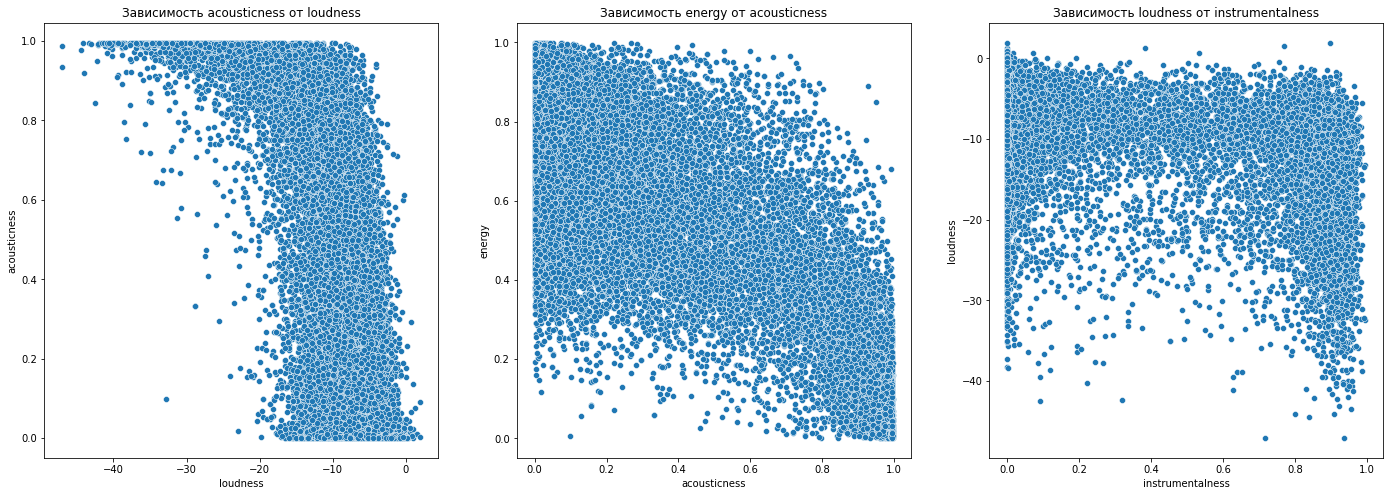

In [ ]:
cor_copy = cor_matrix.copy()
minimums = cor_copy.min(axis=1)
minimums.drop_duplicates(inplace = True)
minimums = minimums.nsmallest(3)

cor_copy = cor_copy.isin(minimums)
cor_copy = cor_copy.T
columns = cor_copy.columns

rows = cor_copy.index
rows_result = list()
columns_result = list()

print('Наибольшая отрицательная корреляция между:')

for column in range(0, len(cor_copy.columns)):
  for row in range(0, len(cor_copy)):
    if(cor_copy.iloc[column, row] == True):
      rows_result.append(rows[row])
      columns_result.append(columns[column])
      print(f"{columns[column]} and {rows[row]}")

fig, axis = plt.subplots(1, 3, figsize = (24, 8))

for i in range(0, 3):
  axis[i].set_title(f"Зависимость {columns_result[i]} от {rows_result[i]}")
  sns.scatterplot(ax = axis[i], data = music, x = rows_result[i], y = columns_result[i])

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

Text(0, 0.5, 'Жанр')

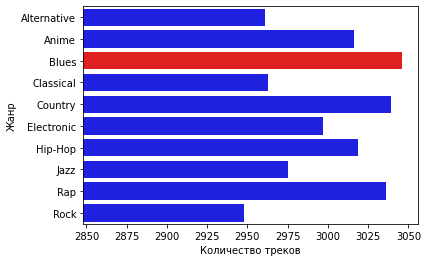

In [ ]:
music_c = music.copy()
music_c = music_c.groupby('music_genre', as_index = False)['instance_id'].count()


max_value = music_c.instance_id.max()
min_value = music_c.instance_id.min()

RedBluePalette = list()
for i in range(0, len(music_c)):
  if(music_c.instance_id[i] == max_value):
    RedBluePalette.append('r')
  else: RedBluePalette.append('b')

plt.xlim(min_value - 100, max_value + 10)
sns.barplot(y = music_c.music_genre, x = music_c.instance_id, palette = RedBluePalette)
plt.xlabel('Количество треков')
plt.ylabel('Жанр')

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

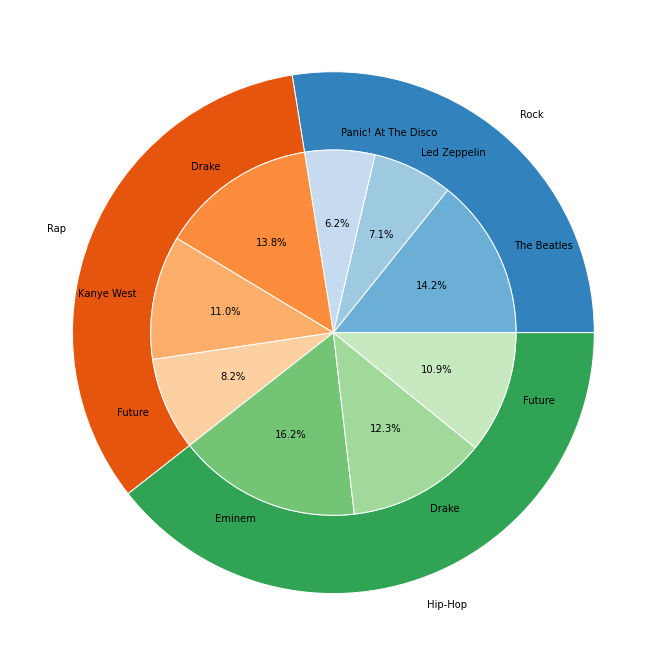

In [ ]:
top_genres = music.copy()
top_artists = music.copy()
top_artists = top_artists[top_artists.artist_name != 'empty_field']

top_genres = top_genres.groupby('music_genre', as_index = False)['popularity'].sum()
top_genres = top_genres.sort_values(by = 'popularity', ascending = False).head(3)

top_artists = top_artists[top_artists['music_genre'].isin(top_genres['music_genre'])]
top_artists = top_artists.groupby(['artist_name', 'music_genre'], as_index = False)['popularity'].sum()
top_artists = top_artists.sort_values(by = ['music_genre', 'popularity'], ascending = False)
top_artists_rock = top_artists.head(3)
top_artists_rap = top_artists[(top_artists.music_genre != 'Hip-Hop') & (top_artists.music_genre != 'Rock')].head(3)
top_artists_hip_hop = top_artists[(top_artists.music_genre != 'Rap') & (top_artists.music_genre != 'Rock')].head(3)

artists_result = top_artists_rap.append(top_artists_rock)
artists_result = artists_result.append(top_artists_hip_hop)
artists_result = artists_result.sort_values(by = 'music_genre', ascending = False)

genres_result = artists_result.groupby('music_genre', as_index = False)['popularity'].sum()
genres_result = genres_result.sort_values(by = 'music_genre', ascending = False)

fig, axis = plt.subplots(1, 1, figsize=(16, 12))

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 3, 5, 6, 7, 9, 10, 11]))

axis.pie(genres_result.popularity, radius=1, labels = genres_result.music_genre, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'))
axis.pie(artists_result.popularity, radius=1-size, labels = artists_result.artist_name, colors=inner_colors, wedgeprops=dict(width = 1-size, edgecolor='w'), autopct='%1.1f%%')
pass

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

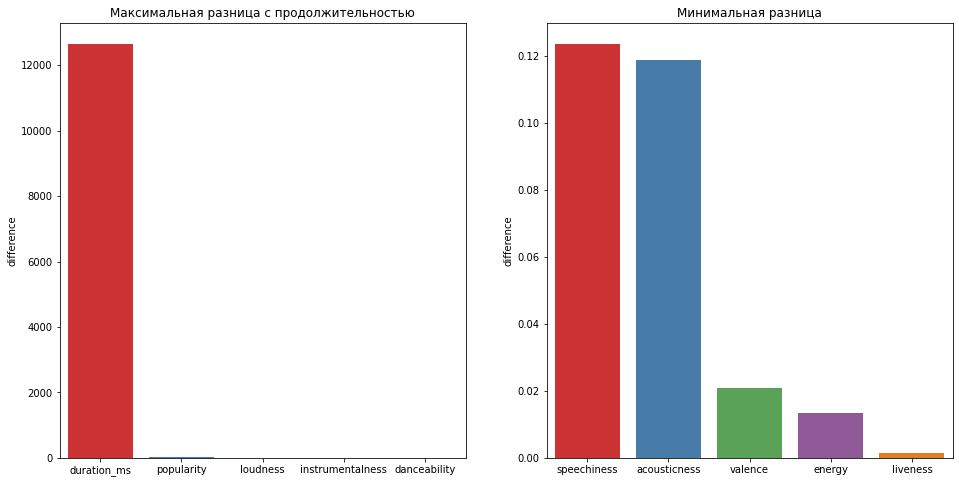

In [ ]:
two_condition = music.copy()
two_condition = two_condition.groupby('music_genre', as_index = False)['popularity'].sum()
two_condition = two_condition.sort_values(by = 'popularity', ascending = False)

max_popularity = two_condition.popularity.max()
min_popularity = two_condition.popularity.min()

two_condition = two_condition[(two_condition.popularity == max_popularity) | (two_condition.popularity == min_popularity)]

parameters = music.copy()
parameters = parameters[parameters['music_genre'].isin(two_condition['music_genre'])]
parameters = parameters.groupby('music_genre', as_index = False)[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']].mean()

genres = list(parameters.pop('music_genre'))
parameters = parameters.T
parameters.columns = genres
parameters['difference'] = parameters[genres[0]] - parameters[genres[1]]
parameters['difference'] = parameters['difference'].abs()
parameters = parameters.sort_values(by = 'difference', ascending = False)

fig, axis = plt.subplots(1, 2, figsize=(16, 8))
axis[0].set_title('Максимальная разница c продолжительностью')
sns.barplot(ax = axis[0], y = parameters.difference.head(5), x = parameters.head(5).index,  palette="Set1")
axis[1].set_title('Минимальная разница')
sns.barplot(ax = axis[1], y = parameters.difference.tail(5), x = parameters.tail(5).index, palette="Set1")
pass

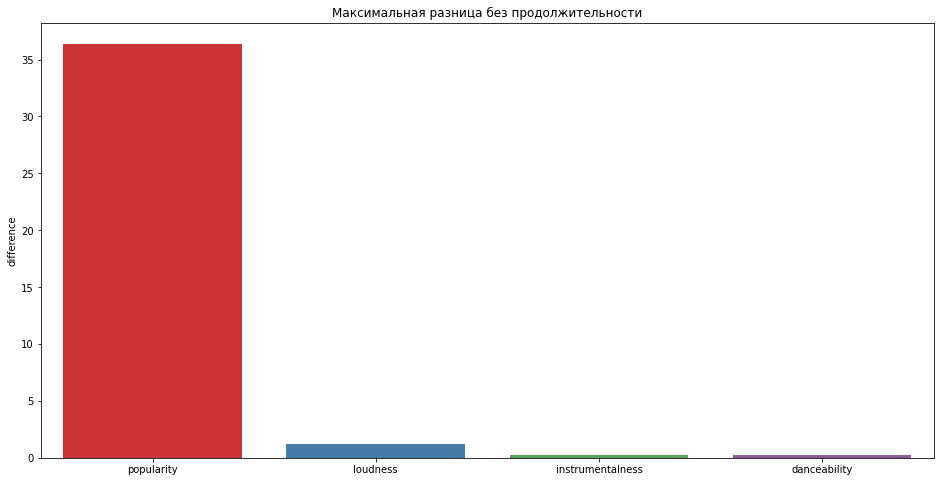

In [ ]:
parameters_c = parameters.copy()
parameters_c.drop('duration_ms', axis = 0, inplace = True)

fig, axis = plt.subplots(1, 1, figsize=(16, 8))
axis.set_title('Максимальная разница без продолжительности')
sns.barplot(ax = axis, y = parameters_c.difference.head(4), x = parameters_c.head(4).index,  palette="Set1")
pass

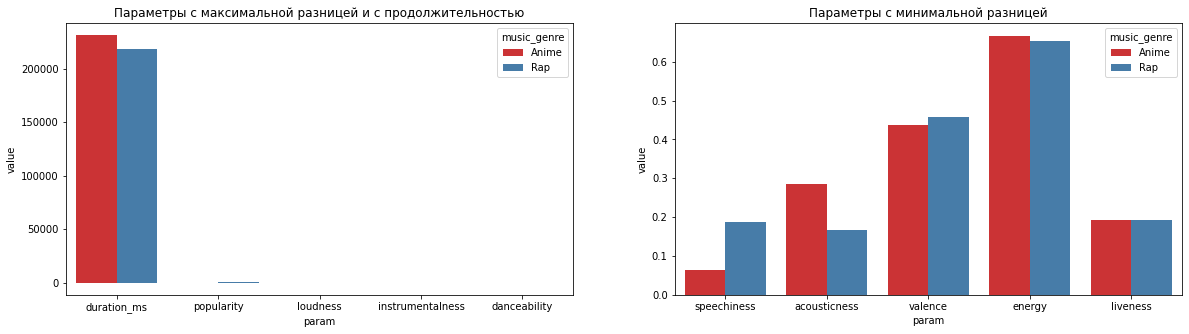

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5))

def prepareDF(df):
  temp = pd.DataFrame()
  for row in df.itertuples():
    temp = temp.append([[genres[0], row.Index, row[1]]])
    temp = temp.append([[genres[1], row.Index, row[2]]])
  temp.columns = ['music_genre', 'param', 'value']
  return temp

max_difference = prepareDF(parameters.head(5))
min_difference = prepareDF(parameters.tail(5))

axis[0].set_title('Параметры с максимальной разницей и с продолжительностью')
plot = sns.barplot(ax = axis[0], y=max_difference.value, x=max_difference.param, hue=max_difference.music_genre, palette="Set1")
axis[1].set_title('Параметры с минимальной разницей')
plot = sns.barplot(ax = axis[1], y=min_difference.value, x=min_difference.param, hue=min_difference.music_genre, palette="Set1")

Text(0, 0.5, 'Значения')

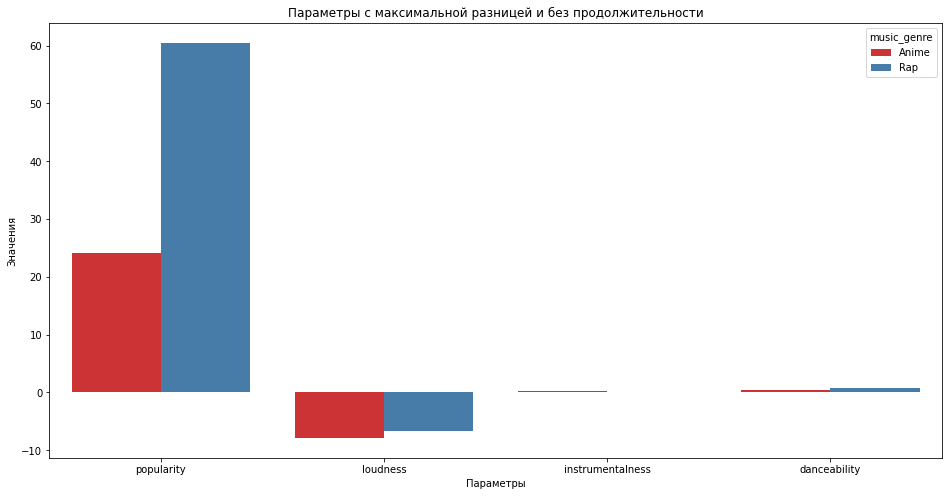

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(16, 8))

max_difference_no_duration = prepareDF(parameters_c.head(4))
axis.set_title('Параметры с максимальной разницей и без продолжительности')
sns.barplot(ax = axis, y=max_difference_no_duration.value, x=max_difference_no_duration.param, hue=max_difference_no_duration.music_genre, palette="Set1")
plt.xlabel('Параметры')
plt.ylabel('Значения')

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

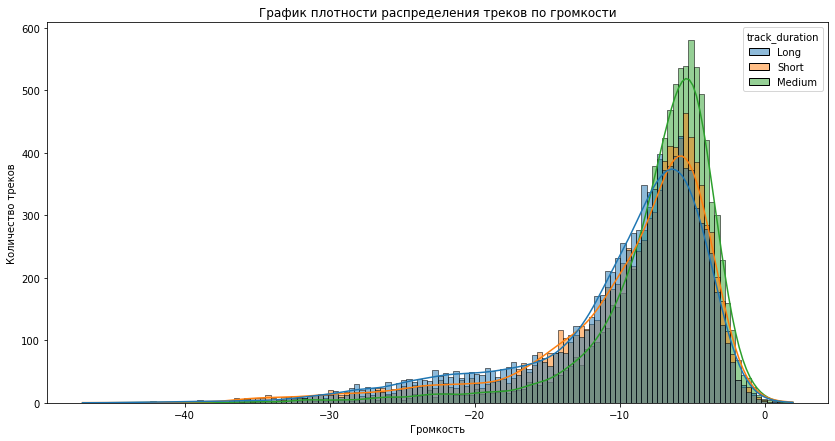

In [ ]:
music_frame = music.copy()

percentiles = music_frame['duration_ms'].describe(percentiles=[.33, .66])[["33%", "66%"]]
music_frame['track_duration'] = music_frame['duration_ms'].apply(lambda x: 'Short' if (x <= percentiles['33%']) else ('Medium' if (x <= percentiles['66%']) else 'Long'))

fig, axis = plt.subplots(1, 1, figsize=(14, 7))
plt.title('График плотности распределения треков по громкости')
plt.xlabel('Громкость')
plt.ylabel('Количество треков')
sns.histplot(ax = axis, data = music_frame, x = music_frame.loudness, kde = True, hue = 'track_duration')
pass

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

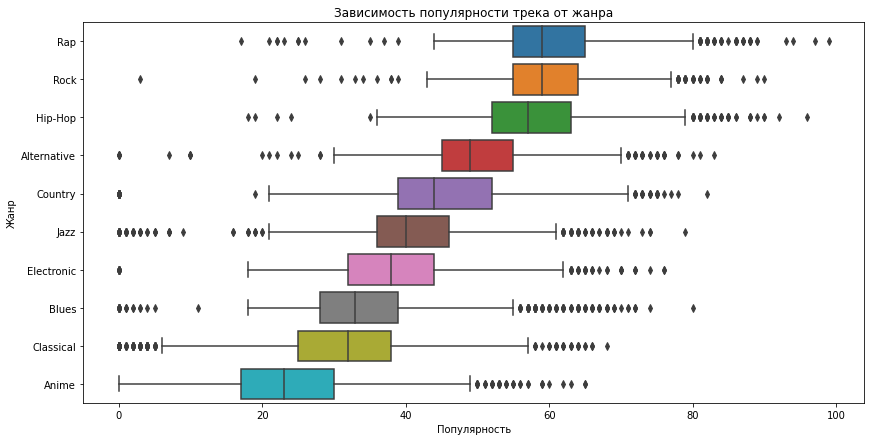

In [ ]:
group = music.copy()

group = group.groupby('music_genre')['popularity'].mean()
group = group.sort_values(ascending = False)

fig, axis = plt.subplots(1, 1, figsize=(14, 7))
sns.boxplot(ax = axis, data = music, x = music['popularity'], y = music['music_genre'], order = group.index, orient = 'h')
plt.title('Зависимость популярности трека от жанра')
plt.xlabel('Популярность')
plt.ylabel('Жанр')
pass

Можно заметить, что жанры Rap, Rock и Hip-Hop имеют практически идентичные ящики, что может свидетельствовать об их некотором сходстве.

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

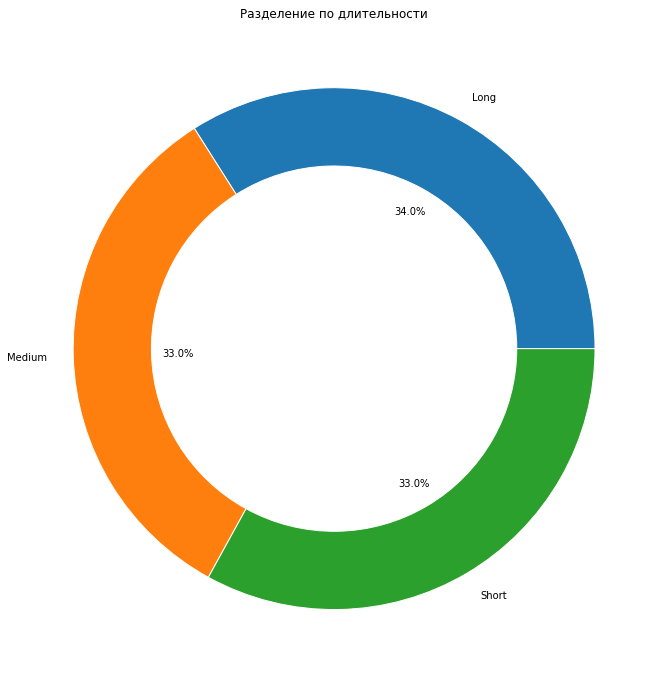

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(16, 12))

music_frame_c = music_frame.groupby('track_duration', as_index = False)['instance_id'].count()

axis.pie(music_frame_c.instance_id, radius=1, labels = music_frame_c.track_duration, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%1.1f%%')
plt.title('Разделение по длительности')
pass

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).


## Задание 9

Покажите на карте количество кофеен в каждой стране, данные о которой есть в датасете.

In [ ]:
!pip install plotly==4.5

In [ ]:
!pip install pycountry
!pip install pycountry-convert

In [ ]:
import plotly.express as px
import pycountry
import pycountry_convert as pc

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=195zMtO3U5ytz6a9hvMCaEmT6RXZqIYJM')
starbucks = pd.DataFrame(data)

In [ ]:
starbucks_frame = starbucks.copy()
starbucks_frame = starbucks_frame.groupby('Country', as_index = False)['Store Number'].count()
starbucks_frame.rename(columns = {'Store Number' : 'stores_number', 'Country' : 'country'}, inplace = True)
starbucks_frame['country_name'] = starbucks_frame['country'].apply(lambda country: pycountry.countries.get(alpha_2 = country).name)

fig = px.choropleth(starbucks_frame, locations = 'country_name', locationmode = 'country names', color = 'stores_number',
                    color_continuous_scale=px.colors.sequential.Greens, range_color = (0, 500),
                    labels = {'country' : 'Country', 'stores_number' : 'The amount of stores'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
!pip install --upgrade plotly

In [ ]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

starbucks_frame['continent'] =  starbucks_frame['country'].apply(lambda country: continents[pc.country_alpha2_to_continent_code(country)])

fig = px.treemap(starbucks_frame, path = [px.Constant('World'), 'continent', 'country_name'], values = 'stores_number', color = 'stores_number', 
                 hover_data = ['country'], color_continuous_scale = px.colors.sequential.Greens, range_color = (0, 1700))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()